# Recipe Ratings
This capstone will explore how various recipe features impact it's online rating. The dataset consists of Food.com recipes scraped for their cooking instructions, nutritional info, and other key features. It is a rather large dataset (500k+ rows) so we have a lot of room to clean and narrow our scope.

This analysis may be useful for bloggers, cookbook writes, and aspiring cooks to get a landscape for what kind of food people are interested in making and react positively to.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lib.sb_utils import save_file
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.5f' % x) #to handle scientific notation

# Recipes Exploration

In [2]:
recipes = pd.read_csv('data/recipes.csv')

In [3]:
recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.30000,8.00000,29.80000,37.10000,3.60000,30.20000,3.20000,4.00000,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.60000,372.80000,368.40000,84.40000,9.00000,20.40000,63.40000,6.00000,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.00000,0.00000,1.80000,81.50000,0.40000,77.20000,0.30000,4.00000,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.80000,0.00000,1558.60000,64.20000,17.30000,32.10000,29.30000,2.00000,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.10000,0.00000,959.30000,25.10000,4.80000,17.70000,4.30000,4.00000,NaN,"c(""Mix everything together and bring to a boil..."


In [4]:
#check how many recipes per author we have 
recipes.shape[0] / recipes.AuthorId.nunique()

9.138427367169191

In [5]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

Fixing the date column from object to timestamp - 

In [6]:
set([len(i) for i in recipes.DatePublished])

{20}

In [7]:
recipes.DatePublished.unique()[1]

'1999-08-29T13:12:00Z'

In [8]:
recipes['DatePublished'] = recipes.DatePublished.apply(lambda x: pd.to_datetime(x[:10]))
recipes['Year'] = [i.year for i in recipes['DatePublished']]

In [9]:
recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,Year
count,522517.00000,522517.00000,269294.00000,275028.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,339606.00000,522517.00000
mean,271821.43697,45725847.89448,4.63201,5.22778,484.43858,24.61492,9.55946,86.48700,767.26388,49.08909,3.84324,21.87825,17.46951,8.60619,2007.55868
std,155495.87842,292971448.66643,0.64193,20.38135,1397.11665,111.48580,46.62262,301.98701,4203.62053,180.82206,8.60316,142.62019,40.12884,114.31981,3.62364
min,38.00000,27.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1999.00000
25%,137206.00000,69474.00000,4.50000,1.00000,174.20000,5.60000,1.50000,3.80000,123.30000,12.80000,0.80000,2.50000,3.50000,4.00000,2005.00000
50%,271758.00000,238937.00000,5.00000,2.00000,317.10000,13.80000,4.70000,42.60000,353.30000,28.20000,2.20000,6.40000,9.10000,6.00000,2007.00000
75%,406145.00000,565828.00000,5.00000,4.00000,529.10000,27.40000,10.80000,107.90000,792.20000,51.10000,4.60000,17.90000,25.00000,8.00000,2009.00000
max,541383.00000,2002886148.00000,5.00000,3063.00000,612854.60000,64368.10000,26740.60000,130456.40000,1246921.10000,108294.60000,3012.00000,90682.30000,18396.20000,32767.00000,2020.00000


In [10]:
recipes.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

### Initial observations
1. Nearly half our dataset doesn't have an "AggregatedRating" value. This is important because we're interested in tracking what influences that score
2. Interesting the the 25th percentile for agg rating is 4.5, that's very high! We'll look at the distribution for ratings next
3. Extreme outliers: We have some values that don't make any sense given some doman knowledge about food nutrients (i.e. over 50 grams of saturated fat in a dish)

## Cleaning: Dropping columns, inspecting nulls, and  fixing datatypes
- We will convert several categorical variables into ordinal ones by storing the length of recipe
- Some of our columns are objects which we would expect to be ints or datetimes (cooktime, preptime, etc.). We'll modify those as well.

In [11]:
#inspect Recipe Instructions
recipes.RecipeInstructions[1]

#count number of words
r_len = [r.count(' ') for r in recipes.RecipeInstructions]

In [12]:
num_ingredients = [r.count(' ') for r in recipes.RecipeIngredientParts]

recipes.RecipeIngredientParts[7777]

'c("soft tofu", "banana", "milk", "water")'

In [13]:
recipes.RecipeIngredientQuantities
#we can drop this since it doesn't give us new information compared to the two above

0                                   c("4", "1/4", "1", "1")
1         c("1", "4", "2", "2", "8", "1/4", "8", "1/2", ...
2                   c("1 1/2", "1", NA, "1 1/2", NA, "3/4")
3         c("12", "1", "2", "1", "10", "1", "3", "2", "2...
4                               c("46", "4", "1", "2", "1")
                                ...                        
522512    c("3", "1/2", "1/2", "1/4", "1/4", "1", "1/4",...
522513         c("9", "2", "4", "2", "1/3", "3 1/2", "1/3")
522514                  c("3", "3", "1/2", "1/2", "2", "2")
522515             c("4", "1/4", "1", "1/2", "8 1/2", "40")
522516    c("6 -7", "1", "1/4", "1", "2", "1/2", "1", "1...
Name: RecipeIngredientQuantities, Length: 522517, dtype: object

In [14]:
#drop unnecessary columns
drop=['AuthorName','Description', 'Images','Keywords','RecipeIngredientQuantities', 'RecipeYield']
recipes.drop(drop, axis=1, inplace=True)

In [15]:
recipes['RecipeInstructions'] = r_len
recipes['RecipeIngredientParts'] = num_ingredients

In [16]:
#re-inspect
recipes.head()

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,DatePublished,RecipeCategory,RecipeIngredientParts,AggregatedRating,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Year
0,38,Low-Fat Berry Blue Frozen Dessert,1533,PT24H,PT45M,PT24H45M,1999-08-09,Frozen Desserts,6,4.50000,...,1.30000,8.00000,29.80000,37.10000,3.60000,30.20000,3.20000,4.00000,99,1999
1,39,Biryani,1567,PT25M,PT4H,PT4H25M,1999-08-29,Chicken Breast,37,3.00000,...,16.60000,372.80000,368.40000,84.40000,9.00000,20.40000,63.40000,6.00000,186,1999
2,40,Best Lemonade,1566,PT5M,PT30M,PT35M,1999-09-05,Beverages,11,4.50000,...,0.00000,0.00000,1.80000,81.50000,0.40000,77.20000,0.30000,4.00000,72,1999
3,41,Carina's Tofu-Vegetable Kebabs,1586,PT20M,PT24H,PT24H20M,1999-09-03,Soy/Tofu,27,4.50000,...,3.80000,0.00000,1558.60000,64.20000,17.30000,32.10000,29.30000,2.00000,257,1999
4,42,Cabbage Soup,1538,PT30M,PT20M,PT50M,1999-09-19,Vegetable,6,4.50000,...,0.10000,0.00000,959.30000,25.10000,4.80000,17.70000,4.30000,4.00000,31,1999


### Nulls

In [17]:
recipes.isna().sum()

RecipeId                      0
Name                          0
AuthorId                      0
CookTime                  82545
PrepTime                      0
TotalTime                     0
DatePublished                 0
RecipeCategory              751
RecipeIngredientParts         0
AggregatedRating         253223
ReviewCount              247489
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings           182911
RecipeInstructions            0
Year                          0
dtype: int64

We will handle our missing rating data in a bit, but for now let's make all null values for CookTime = 0. We will follow the format we saw in our head for time (PTxHyM)

In [18]:
recipes.fillna({'CookTime':'PT0S'},inplace=True)

### Cleaning CookTime, PrepTime, TotalTime
These columns seem to be of the format "PTnHnM" where n = number of hours/minutes
- First we'll check all rows are alphanumeric using isalnum()
- Then we'll write a script to extract the time as an int

In [19]:
ct = list(recipes.CookTime.unique())
pt = list(recipes.PrepTime.unique())
tt = list(recipes.TotalTime.unique())

Check if any values are not alphanumeric

In [20]:
[ct[i] for i in range(len(ct)) if type(ct[i])==str and ct[i].isalnum()==False]

[]

In [21]:
[pt[i] for i in range(len(pt)) if type(pt[i])==str and pt[i].isalnum()==False]

['PT-30M', 'PT-1M']

In [22]:
[tt[i] for i in range(len(tt)) if type(tt[i])==str and tt[i].isalnum()==False]

['PT-2M']

Good to know, we can strip the dash in our function

In [23]:
t1= 'PT1H15M'
t2= 'PT1H'
t3= 'PT-5M'

def cleantime(s):
    s = s[2:].strip('-') #get rid of 'PT' for each entry
    if s.find('H')!= -1:
        h = int(s[:s.find('H')])
        if s.find('M')!= -1:
            m = int(s[s.find('H')+1:s.find('M')]) / 60
        else:
            m=0
    elif s.find('H')== -1:
        h=0
        m = int(s[s.find('H')+1:s.find('M')]) / 60
    return round(h+m,3)
cleantime(t1),cleantime(t2),cleantime(t3)

(1.25, 1, 0.083)

In [24]:
recipes['PrepTime'] = recipes.PrepTime.apply(lambda x: cleantime(x))
recipes['CookTime'] = recipes.CookTime.apply(lambda x: cleantime(x))
recipes['TotalTime'] = recipes.TotalTime.apply(lambda x: cleantime(x))

In [25]:
recipes.describe()

,RecipeId,AuthorId,CookTime,PrepTime,TotalTime,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Year
count,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,269294.00000,275028.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,522517.00000,339606.00000,522517.00000,522517.00000
mean,271821.43697,45725847.89448,3.30553,0.93494,4.24168,12.52648,4.63201,5.22778,484.43858,24.61492,9.55946,86.48700,767.26388,49.08909,3.84324,21.87825,17.46951,8.60619,101.65184,2007.55868
std,155495.87842,292971448.66643,1038.23473,51.59246,1040.21314,7.33693,0.64193,20.38135,1397.11665,111.48580,46.62262,301.98701,4203.62053,180.82206,8.60316,142.62019,40.12884,114.31981,78.09089,3.62364
min,38.00000,27.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1999.00000
25%,137206.00000,69474.00000,0.16700,0.16700,0.33300,7.00000,4.50000,1.00000,174.20000,5.60000,1.50000,3.80000,123.30000,12.80000,0.80000,2.50000,3.50000,4.00000,51.00000,2005.00000
50%,271758.00000,238937.00000,0.33300,0.25000,0.66700,11.00000,5.00000,2.00000,317.10000,13.80000,4.70000,42.60000,353.30000,28.20000,2.20000,6.40000,9.10000,6.00000,83.00000,2007.00000
75%,406145.00000,565828.00000,0.75000,0.33300,1.16700,17.00000,5.00000,4.00000,529.10000,27.40000,10.80000,107.90000,792.20000,51.10000,4.60000,17.90000,25.00000,8.00000,129.00000,2009.00000
max,541383.00000,2002886148.00000,725760.00000,24000.00000,725880.00000,105.00000,5.00000,3063.00000,612854.60000,64368.10000,26740.60000,130456.40000,1246921.10000,108294.60000,3012.00000,90682.30000,18396.20000,32767.00000,2315.00000,2020.00000


We have some pretty extreme outliers for time now. We saw some oddly large values in our unique values as well. These are very likely entry errors, so we'll just drop those rows. 3 days seems like a reasonable baseline for TotalTime. 

It's also odd for a recipe to take no time at all, so we'll look at rows where total time = 0 too.

In [26]:
recipes[recipes.TotalTime>72]

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,DatePublished,RecipeCategory,RecipeIngredientParts,AggregatedRating,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Year
50,90,Almond Paste,1537,168.00000,0.25000,168.25000,1999-08-23,Dessert,4,4.00000,...,9.00000,0.00000,49.10000,244.00000,22.60000,210.70000,48.90000,NaN,117,1999
1277,2714,Hard Apple Cider,1549,2784.00000,0.00000,2784.00000,1999-08-16,Beverages,8,5.00000,...,0.10000,0.00000,14.20000,76.70000,0.60000,72.80000,0.50000,NaN,166,1999
1336,2776,No-Bake Rum Balls,10033,72.00000,0.08300,72.08300,1999-08-13,No Cook,8,5.00000,...,0.30000,0.00000,1.20000,7.10000,0.50000,5.60000,0.50000,NaN,31,1999
1585,3047,Dried Figs,1534,72.00000,12.00000,84.00000,1999-09-30,Lunch/Snacks,7,NaN,...,0.00000,0.00000,7025.10000,599.90000,0.00000,598.80000,0.00000,NaN,68,1999
1990,3476,Friendship Fruit Starter &amp; Cake,1534,0.00000,817.50000,817.50000,1999-10-19,Quick Breads,14,5.00000,...,4.50000,41.80000,326.50000,129.40000,1.90000,117.40000,4.00000,24.00000,172,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520633,539343,Mary's Coffee Liqueur,176706,72.00000,0.16700,72.16700,2019-10-08,Dessert,9,NaN,...,0.00000,0.00000,4.30000,20.90000,0.00000,20.70000,0.00000,20.00000,191,2019
520654,539365,Fire Cider,296050,1032.00000,0.25000,1032.25000,2019-10-14,Low Protein,16,NaN,...,1.00000,0.00000,99.30000,213.10000,15.30000,163.90000,8.60000,NaN,250,2019
520986,539708,Dry Aged Prime Rib Roast,1072593,3.00000,240.00000,243.00000,2020-01-01,Roast Beef,21,NaN,...,31.90000,1060.60000,5733.60000,17.10000,4.50000,4.10000,345.20000,NaN,341,2020
522040,540900,Chokecherry Punch Concentrate or Chokecherry S...,510859,0.25000,72.00000,72.25000,2020-09-03,Beverages,1,NaN,...,0.00000,0.00000,57.30000,48.60000,0.00000,23.50000,0.00000,10.00000,165,2020


In [27]:
recipes = recipes[recipes.TotalTime<72]
recipes.reset_index(drop=True,inplace=True)

In [28]:
recipes[recipes.TotalTime==0]

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,DatePublished,RecipeCategory,RecipeIngredientParts,AggregatedRating,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Year
320,387,Chocolate Coffee Ice Cream Soda,1737,0.00000,0.00000,0.00000,1999-08-30,Frozen Desserts,7,5.00000,...,0.70000,4.30000,164.60000,19.60000,0.00000,18.20000,1.00000,1.00000,28,1999
609,707,"Tricolor Crustless ""Quiche""",39547,0.00000,0.00000,0.00000,1999-08-08,Savory Pies,17,5.00000,...,16.10000,183.40000,362.90000,46.60000,5.90000,4.30000,21.30000,NaN,170,1999
612,715,Unusual Chicken,1697,0.00000,0.00000,0.00000,1999-09-21,Chicken,21,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,116,1999
615,721,Vidalia Onion Casserole,1746,0.00000,0.00000,0.00000,1999-08-21,Vegetable,8,4.50000,...,17.20000,180.20000,315.20000,14.70000,1.70000,5.50000,11.20000,4.00000,90,1999
617,736,Whole Grain Buttermilk Pancakes,1530,0.00000,0.00000,0.00000,1999-09-07,Breakfast,12,5.00000,...,0.50000,36.10000,154.20000,8.90000,1.20000,2.20000,3.00000,12.00000,124,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280675,292556,Soft Lemon Frosting,537937,0.00000,0.00000,0.00000,2008-03-19,Dessert,4,NaN,...,3.00000,5.60000,23.70000,15.50000,0.00000,15.30000,1.40000,NaN,14,2008
348408,362277,Potato Pancakes - Latkes,159217,0.00000,0.00000,0.00000,2009-03-22,Breakfast,7,NaN,...,3.50000,423.00000,221.30000,249.10000,30.20000,15.60000,41.40000,1.00000,81,2009
349388,363272,Chicken Spread,1170033,0.00000,0.00000,0.00000,2009-03-28,Spreads,3,NaN,...,114.70000,861.90000,1699.90000,12.10000,0.00000,0.90000,152.50000,1.00000,12,2009
355842,369899,How to Skin Tomatoes,302689,0.00000,0.00000,0.00000,2009-05-05,Vegetable,2,5.00000,...,0.10000,0.00000,10.90000,4.80000,1.50000,3.20000,1.10000,NaN,87,2009


In [29]:
#Seems unlikely we can trust recipes with no cooktime, and there aren't many rows with respect to our df
#We'll drop those too
recipes = recipes[recipes.TotalTime>0]
recipes.reset_index(drop=True,inplace=True)

## Null Ratings & Reviews Dataset
Now that our recipes data is cleaner, we can turn our attention to the 'Rating' data. Half our recipes dataset do not have a rating. At this point we can look at our second dataset which contains information about reviews specifically. We will explore that data and determine if we can merge our information about ratings together.

In [30]:
#get a sense of the shape of our null values
recipes.isna().sum()

RecipeId                      0
Name                          0
AuthorId                      0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
RecipeCategory              729
RecipeIngredientParts         0
AggregatedRating         251683
ReviewCount              246022
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings           181530
RecipeInstructions            0
Year                          0
dtype: int64

In [31]:
#fill empty categories with empty string
recipes.fillna({'RecipeCategory':''},inplace=True)

In [32]:
#Make sure we don't also have 0 values for number of review counts
len(recipes[recipes.ReviewCount==0])

0

### Reviews
Next we will read out reviews dataset and filter down to mean review for each recipe.

In [33]:
reviews = pd.read_csv('data/reviews.csv')
reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [34]:
reviews.drop(columns=['AuthorId','AuthorName','Review','DateSubmitted','DateModified'], inplace=True)

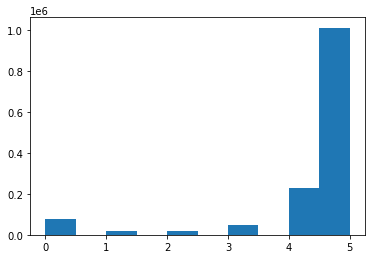

In [35]:
_=plt.hist(reviews.Rating)

In [36]:
#create a df for mean rating per recipe
recipe_ratings = reviews.groupby('RecipeId').agg({'Rating':np.mean})
recipe_ratings.shape

(271678, 1)

In [37]:
#Merge our two dataframes together
merged = pd.merge(recipes, recipe_ratings,on='RecipeId')
merged.reset_index(drop=True, inplace=True)
merged.isna().sum()

RecipeId                     0
Name                         0
AuthorId                     0
CookTime                     0
PrepTime                     0
TotalTime                    0
DatePublished                0
RecipeCategory               0
RecipeIngredientParts        0
AggregatedRating          5619
ReviewCount                  0
Calories                     0
FatContent                   0
SaturatedFatContent          0
CholesterolContent           0
SodiumContent                0
CarbohydrateContent          0
FiberContent                 0
SugarContent                 0
ProteinContent               0
RecipeServings           97273
RecipeInstructions           0
Year                         0
Rating                       0
dtype: int64

In [38]:
merged.describe()

,RecipeId,AuthorId,CookTime,PrepTime,TotalTime,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Year,Rating
count,269755.00000,269755.00000,269755.00000,269755.00000,269755.00000,269755.00000,264136.00000,269755.00000,269755.00000,269755.00000,...,269755.00000,269755.00000,269755.00000,269755.00000,269755.00000,269755.00000,172482.00000,269755.00000,269755.00000,269755.00000
mean,219411.14282,6455305.93543,0.81506,0.45066,1.26670,12.42712,4.63814,5.28535,473.45800,23.82706,...,84.46467,754.23159,48.25080,3.71771,21.32836,17.36006,8.13311,97.26847,2006.34250,4.34608
std,141441.27856,108621217.98579,2.17283,1.92960,2.92387,7.22760,0.63274,20.56312,1138.78101,50.86614,...,177.17881,3654.60061,229.38739,7.17861,185.99733,28.43061,80.12754,73.21343,3.01248,0.98650
min,38.00000,27.00000,0.00000,0.00000,0.01700,0.00000,1.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1999.00000,0.00000
25%,96092.50000,55882.00000,0.16700,0.16700,0.33300,7.00000,4.50000,1.00000,173.20000,5.60000,...,4.20000,128.70000,12.70000,0.80000,2.40000,3.50000,4.00000,50.00000,2004.00000,4.00000
50%,203990.00000,171790.00000,0.33300,0.25000,0.66700,11.00000,5.00000,2.00000,312.40000,13.50000,...,42.20000,361.60000,27.80000,2.10000,6.30000,9.20000,6.00000,80.00000,2007.00000,4.69231
75%,330369.00000,399367.00000,0.75000,0.33300,1.08300,16.00000,5.00000,4.00000,518.40000,26.90000,...,106.20000,798.80000,50.00000,4.40000,17.20000,25.40000,8.00000,124.00000,2008.00000,5.00000
max,541298.00000,2002848998.00000,72.00000,168.00000,70.25000,85.00000,5.00000,3063.00000,434360.20000,11169.40000,...,37224.00000,731056.40000,108294.60000,1748.60000,90682.30000,3276.20000,32767.00000,2315.00000,2020.00000,5.00000


By pulling ratings from our reviews dataset, we got more ratings, and more continuous values. Let's drop the old rating column and keep this instead.

In [39]:
merged.drop(columns='AggregatedRating', inplace=True)

In [41]:
merged.isna().sum()

RecipeId                     0
Name                         0
AuthorId                     0
CookTime                     0
PrepTime                     0
TotalTime                    0
DatePublished                0
RecipeCategory               0
RecipeIngredientParts        0
ReviewCount                  0
Calories                     0
FatContent                   0
SaturatedFatContent          0
CholesterolContent           0
SodiumContent                0
CarbohydrateContent          0
FiberContent                 0
SugarContent                 0
ProteinContent               0
RecipeServings           97273
RecipeInstructions           0
Year                         0
Rating                       0
dtype: int64

# In Conclusion
We have a clean dataset with no null values, removed significant outliers and possible mistaken entries, and reformatted several important rows to give us a measure of time. We should have a sufficient amount of information to begin exploring relationships between features in EDA.

Potential questions to consider testing:
- Is there a relationship between rating and calories or grams of certain nutrients (relative to the average values of those nutrients)?
- Is there a relationship between cooking times and rating?
- Does Recipe Category influence nutritional information or rating?

## Save Our Data

In [42]:
datapath = 'data' 
save_file(merged, 'cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "data/cleaned.csv"
